## Project Description
This project involves exploratory data analysis (EDA) on the Adult Income dataset to visualize the relationships between various demographic and socioeconomic variables. The dataset is cleaned and preprocessed to handle missing values, duplicates, and irrelevant data. The project uses a combination of histograms, bar charts, and categorical plots to visualize the distribution of variables such as age, sex, workclass, occupation, education, capital gain, capital loss, and hours worked per week. The relationships between these variables are also explored, including the impact of sex on these relationships. 

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Data Loading and Exploration

In [34]:
# Load the dataset
df=pd.read_csv('adult.csv')

In [101]:
# Display the first few rows of the dataset
df.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [37]:
# Check for missing values
df.isnull().sum()

Age                0
Workclass          0
fnlgwt             0
Education          0
Education Num      0
Marital Status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital Gain       0
Capital Loss       0
Hours/Week         0
Country            0
Above/Below 50k    0
dtype: int64

In [38]:
# Check for duplicate rows
df.duplicated().sum()

24

In [41]:
df['Above/Below 50k'].value_counts()

Above/Below 50k
 <=50K    24698
 >50K      7839
Name: count, dtype: int64

## Data Quality Issue
- Tha Dataset contains some Duplicates Values.
- Some Columns such as (Workclass,Occupation,Country) contains Irrelevent value e.g("?")
- To handle the such Irrelevent value we need to replace with NaN values then either we can drop or Fill

## Data Cleaning and Preprocessing

In [42]:
df=df.drop_duplicates()

In [43]:
df.duplicated().sum()

0

In [47]:
# Replace irrelevant values with NaN
df['Workclass']=df['Workclass'].str.strip().replace('?',np.nan)
df['Occupation']=df['Occupation'].str.strip().replace('?',np.nan)
df['Country']=df['Country'].str.strip().replace('?',np.nan)

In [49]:
# check for Null Values
df.isnull().sum()

Age                   0
Workclass          1836
fnlgwt                0
Education             0
Education Num         0
Marital Status        0
Occupation         1843
Relationship          0
Race                  0
Sex                   0
Capital Gain          0
Capital Loss          0
Hours/Week            0
Country             582
Above/Below 50k       0
dtype: int64

In [52]:
# Filling Missing Values with mode
df['Workclass']=df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Country']=df['Country'].fillna(df['Country'].mode()[0])

In [53]:
# check null values again
df.isnull().sum()


Age                0
Workclass          0
fnlgwt             0
Education          0
Education Num      0
Marital Status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital Gain       0
Capital Loss       0
Hours/Week         0
Country            0
Above/Below 50k    0
dtype: int64

## Visualization

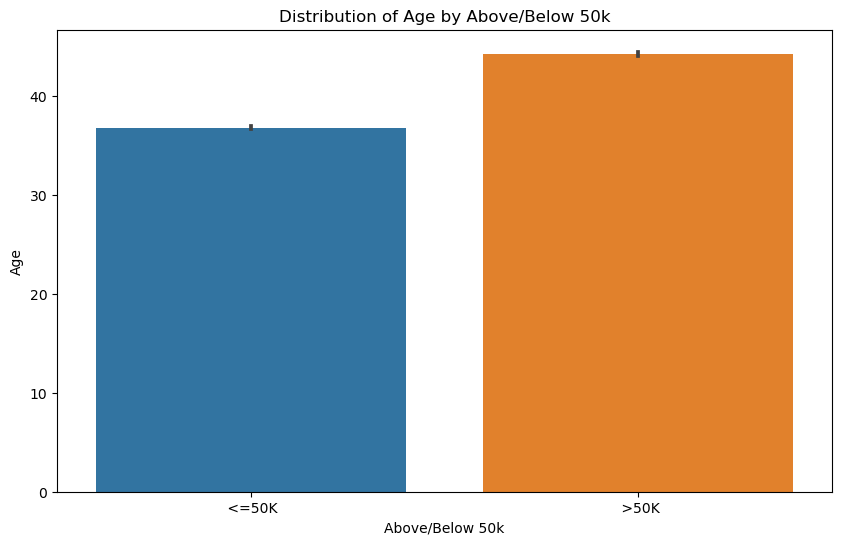

In [87]:
# Creates a bar chart to visualize the distribution of age by income category (above/below $50,000).
plt.figure(figsize=(10,6))
sns.barplot(x='Above/Below 50k',y='Age',data=df)
plt.title('Distribution of Age by Above/Below 50k')
plt.xlabel('Above/Below 50k')
plt.ylabel('Age')
plt.show()

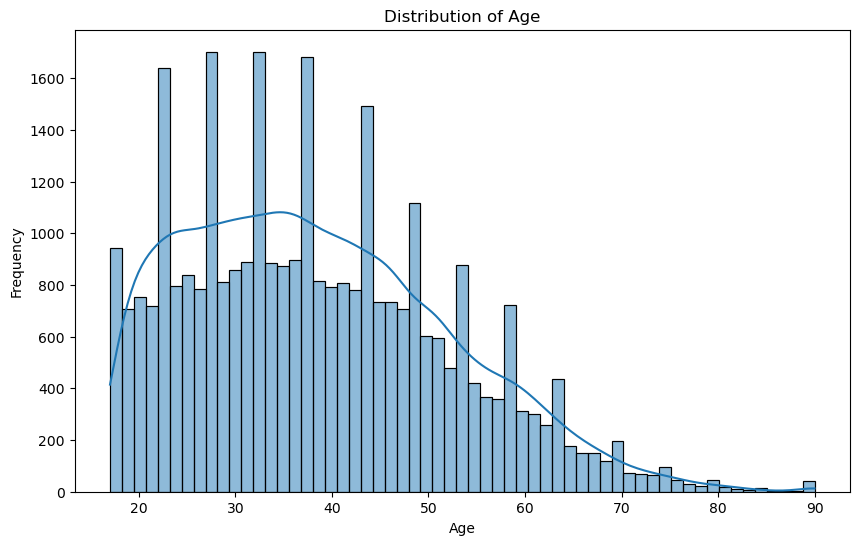

In [88]:
# Creates a histogram with a kernel density estimate (KDE) to visualize the distribution of age in the dataset.
plt.figure(figsize=(10,6))
sns.histplot(x='Age',data=df,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

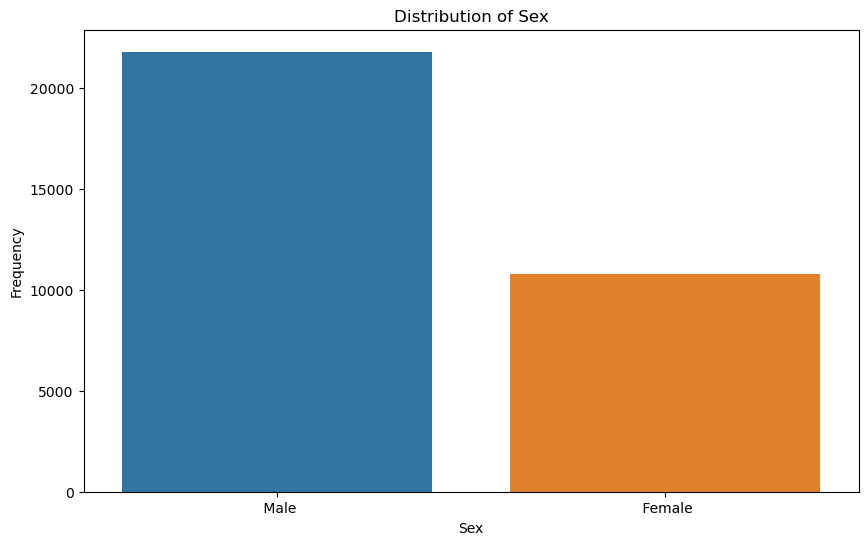

In [89]:
# Creates a bar chart to visualize the distribution of sex in the dataset, showing the frequency of males and females.
plt.figure(figsize=(10,6))
sns.countplot(x='Sex',data=df)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()


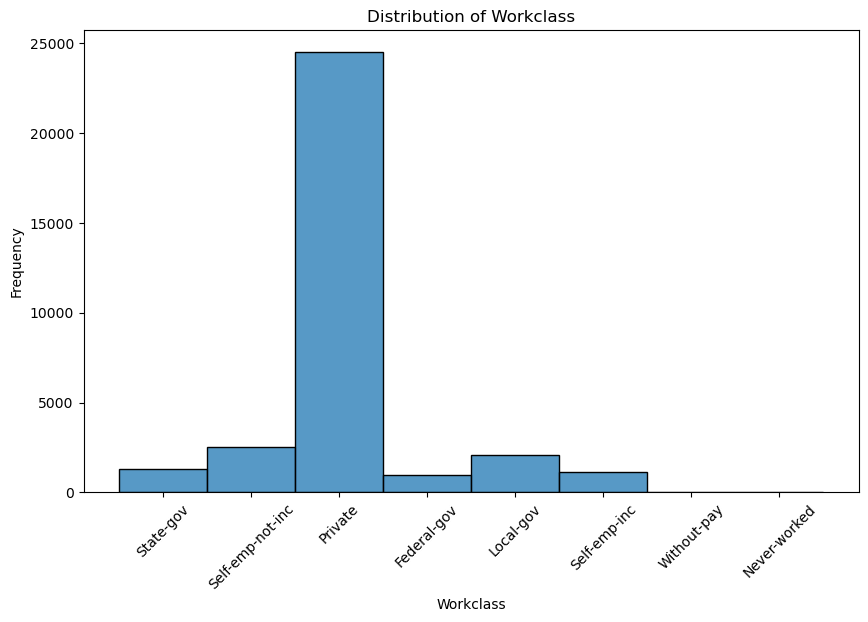

In [91]:
# Creates a histogram to visualize the distribution of workclass in the dataset, with rotated x-axis labels for better readability.
plt.figure(figsize=(10,6))
sns.histplot(x='Workclass',data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.show()

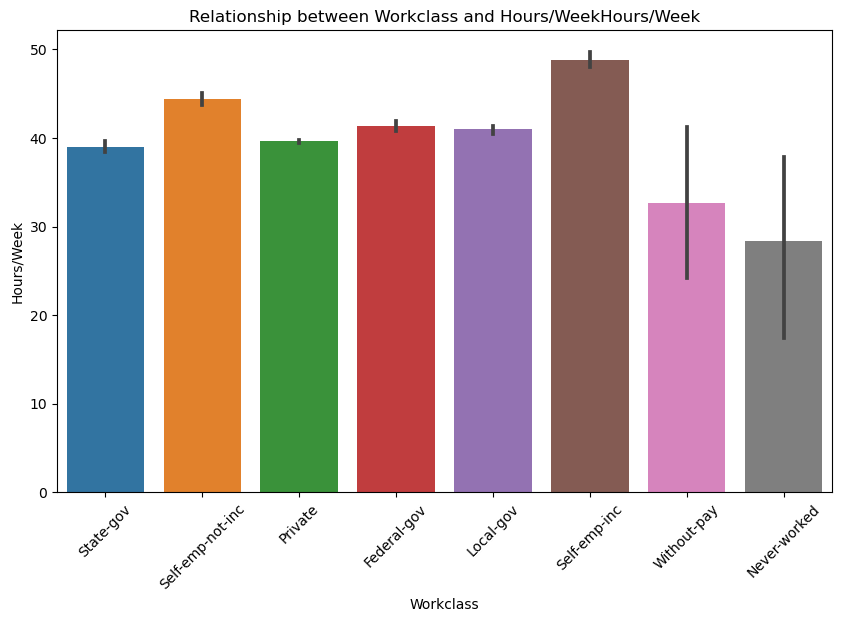

In [92]:
# Creates a bar chart to visualize the relationship between workclass and hours worked per week, with rotated x-axis labels for better readability.
plt.figure(figsize=(10,6))
sns.barplot(x='Workclass',y='Hours/Week',data=df)
plt.title('Relationship between Workclass and Hours/WeekHours/Week')
plt.xlabel('Workclass')
plt.ylabel('Hours/Week')
plt.xticks(rotation=45)
plt.show()

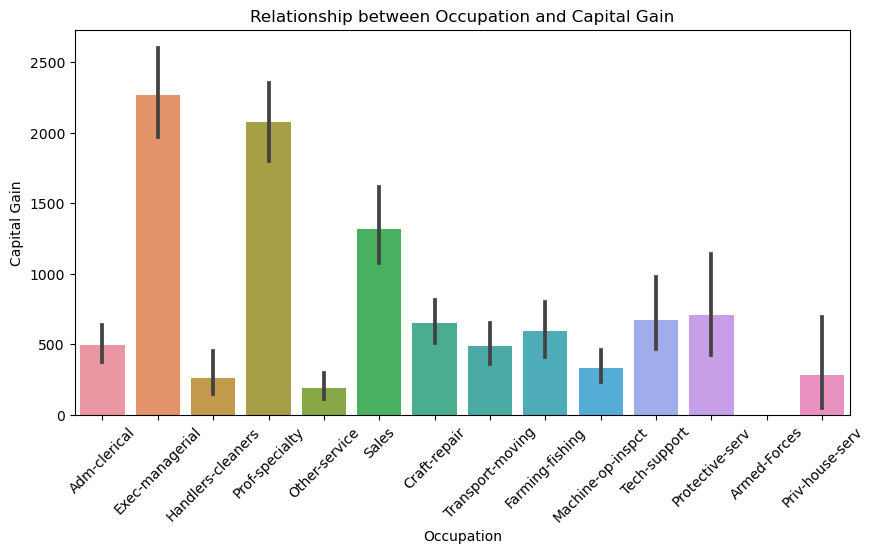

In [93]:
# Creates a bar chart to visualize the relationship between occupation and capital gain, with rotated x-axis labels for better readability.
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation',y='Capital Gain', data=df)
plt.title('Relationship between Occupation and Capital Gain')
plt.xlabel('Occupation')
plt.ylabel('Capital Gain')
plt.xticks(rotation=45)
plt.show()

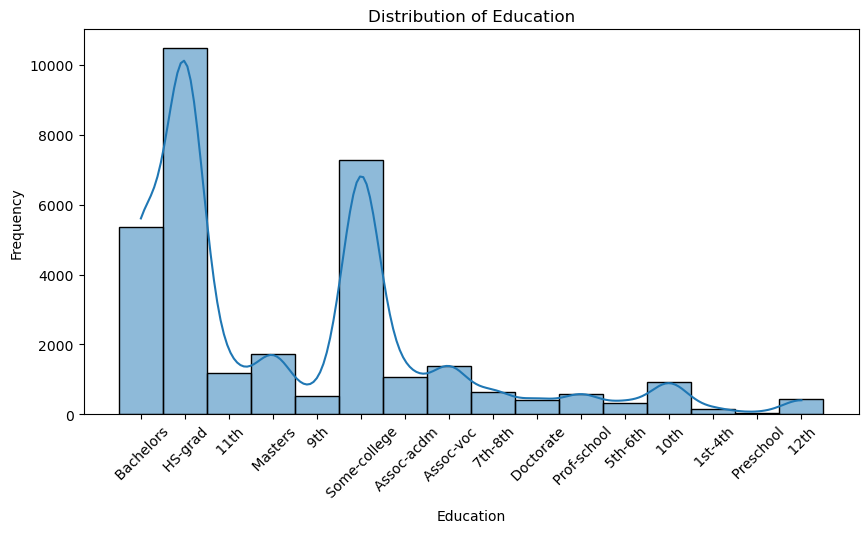

In [94]:
# Creates a histogram to visualize the distribution of education levels, with a kernel density estimate (KDE) and rotated x-axis labels for better readability
plt.figure(figsize=(10,5))
sns.histplot(x='Education',data=df,kde=True)
plt.xticks(rotation=45)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

D:\Anaconda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

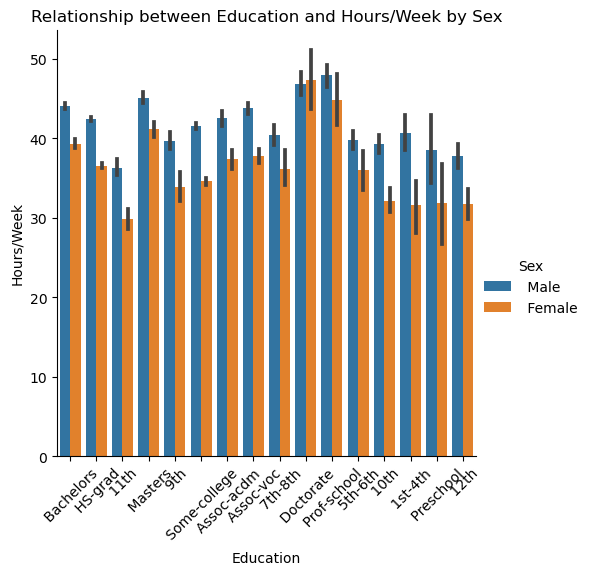

In [95]:
# Creates a categorical bar plot to visualize the relationship between education level and hours worked per week, faceted by sex.
plt.figure(figsize=(10,5))
sns.catplot(x='Education',y='Hours/Week',hue='Sex',data=df,kind='bar')
plt.xticks(rotation=45)
plt.title('Relationship between Education and Hours/Week by Sex')
plt.xlabel('Education')
plt.ylabel('Hours/Week')
plt.show()

D:\Anaconda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

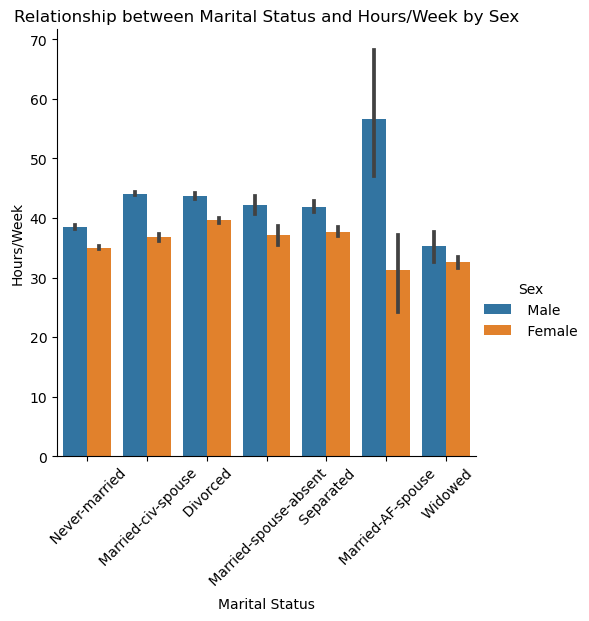

In [96]:
# Creates a categorical bar plot to visualize the relationship between marital status and hours worked per week, faceted by sex.
plt.figure(figsize=(10,5))
sns.catplot(x='Marital Status',y='Hours/Week',hue='Sex',data=df,kind='bar')
plt.xticks(rotation=45)
plt.title('Relationship between Marital Status and Hours/Week by Sex')
plt.xlabel('Marital Status')
plt.ylabel('Hours/Week')
plt.show()

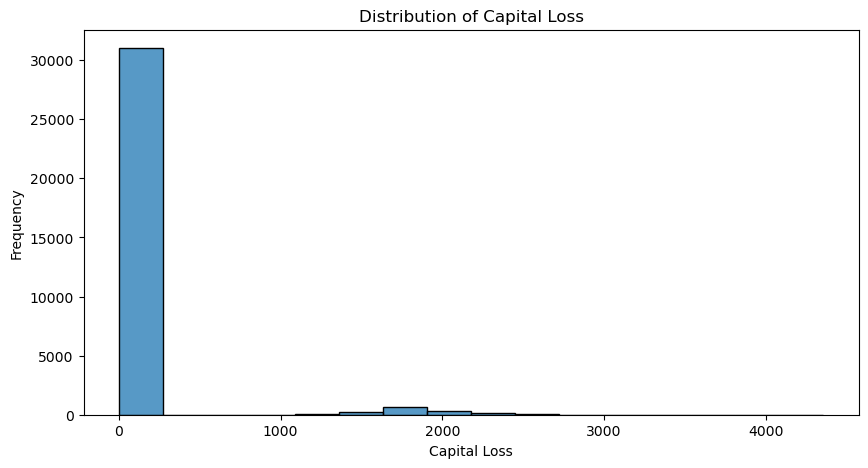

In [97]:
# Creates a histogram to visualize the distribution of capital loss.
plt.figure(figsize=(10,5))
sns.histplot(x='Capital Loss',data=df)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.show()

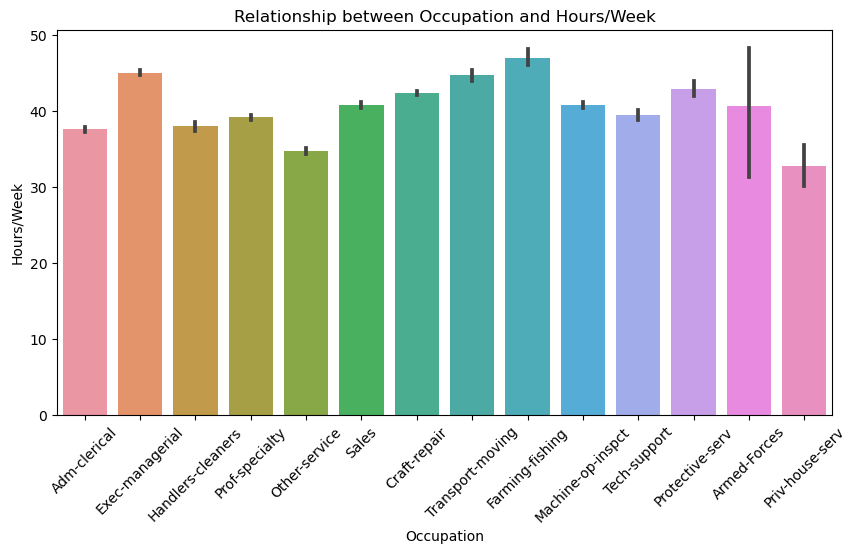

In [98]:
# Creates a bar plot to visualize the relationship between occupation and hours worked per week.
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation',y='Hours/Week',data=df)
plt.xticks(rotation=45)
plt.title('Relationship between Occupation and Hours/Week')
plt.xlabel('Occupation')
plt.ylabel('Hours/Week')
plt.show()


D:\Anaconda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

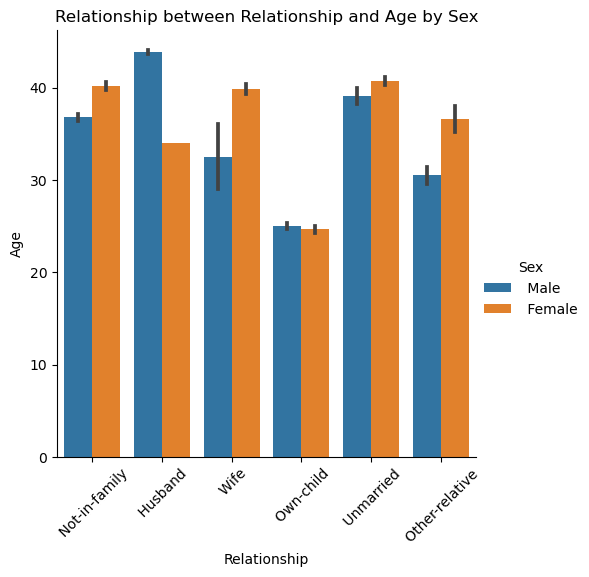

In [99]:
# Creates a categorical plot to visualize the relationship between relationship and age, separated by sex.
plt.figure(figsize=(10,5))
sns.catplot(x='Relationship',y='Age',hue='Sex',data=df,kind='bar')
plt.title('Relationship between Relationship and Age by Sex')
plt.xlabel('Relationship')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

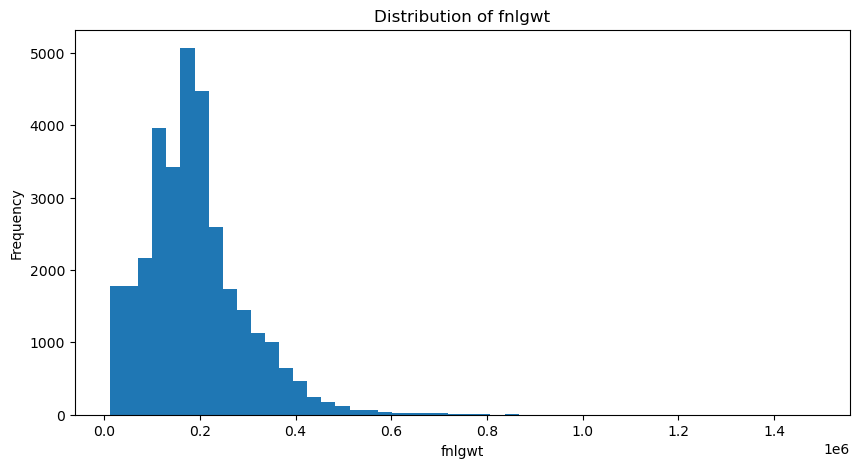

In [100]:
# Creates a histogram to visualize the distribution of the fnlgwt variable.
plt.figure(figsize=(10,5))
plt.hist(df['fnlgwt'],bins=50)
plt.title('Distribution of fnlgwt')
plt.xlabel('fnlgwt')
plt.ylabel('Frequency')
plt.show()